In [15]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [33]:
#Load Cleansed Data
df_analysis_gathering = pd.read_csv('/content/New_Cleansed_Data.csv')

In [34]:
#Transform Gathering Info
df_analysis_gathering.loc[df_analysis_gathering['GatheringRestrictions'] == 0, 'GatheringDetail'] = 'No_Restriction'
df_analysis_gathering.loc[df_analysis_gathering['GatheringRestrictions'] == 1, 'GatheringDetail'] = 'Restriction_1000+_people'
df_analysis_gathering.loc[df_analysis_gathering['GatheringRestrictions'] == 2, 'GatheringDetail'] = 'Restriction_1000_people'
df_analysis_gathering.loc[df_analysis_gathering['GatheringRestrictions'] == 3, 'GatheringDetail'] = 'Restriction_100_people'
df_analysis_gathering.loc[df_analysis_gathering['GatheringRestrictions'] == 4, 'GatheringDetail'] = 'Restriction_10_people'

In [36]:
#Select Specific Columns
df_analysis_gathering = df_analysis_gathering[[
    'State' ,
    'Date' ,
    'GatheringDetail'
    ]]

In [37]:
df_graph_gathering = df_analysis_gathering.groupby(['State','GatheringDetail'])['Date'].count().reset_index(name= 'Counts')

In [38]:
df1_graph_gathering = pd.pivot_table(df_graph_gathering,values = 'Counts', index=['State'], columns = ['GatheringDetail']).reset_index()

In [46]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of Days')

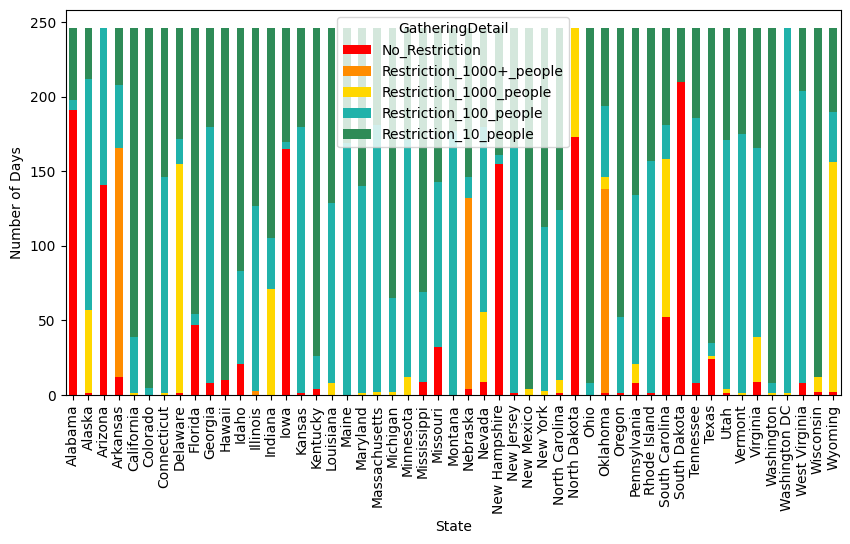

In [72]:
colors = ["red", "darkorange", "gold", "lightseagreen", "seagreen"]
df1_graph_gathering.plot(x= "State", y= ["No_Restriction", "Restriction_1000+_people", "Restriction_1000_people", "Restriction_100_people", "Restriction_10_people"], kind = "bar", stacked = "true", figsize= (10,5), color=colors)
plt.xlabel('State')
plt.ylabel('Number of Days')